# Python Plotter

**Data path and step / timestamp**

Select the relative path for your data file. Also select the step (int) or timestamp (in seconds) you want to plot. You only need to select one (time or step).

In [28]:
import numpy as np
import matplotlib.pyplot as plt


filename = "C:/Users/lucas/Desktop/GOLP/runs/7eV_run/fort.11"
step = 16
time_stamp = None #ps

### Array Definition ###
i, x, v, rho, te, ti, depo = [], [], [], [], [], [], []
data = [i, x, v, rho, te, ti, depo]

Select the variables you want to plot. 
- 0 - Index
- 1 - Position (x)
- 2 - Velocity (v)
- 3 - Density (rho)
- 4- Electronic Temperature (te)
- 5 - Ionic Temperature (ti)
- 6 - Deposition (depo)

In [29]:
x = data[1]
y = data[3]

Code backend processing for fort.11 files.

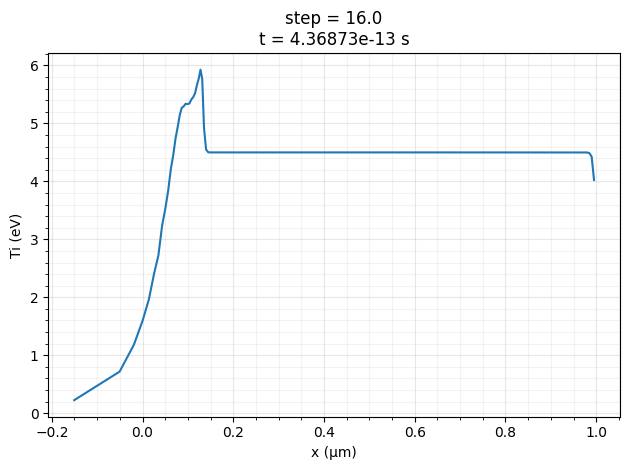

In [30]:
#File opening and iteration loop
step_buffer = None
time_stamp_buffer = None
collect_status = False

with open(filename, "r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        s = line.strip()
        s = s.split()
        if not s: #Checks if line is blank
            continue
        if s[0] == "step=":
            if collect_status == True:
                break
            if step != None:
                step_buffer = float(s[1])
                if step == step_buffer:
                    time_stamp_buffer = float(s[3])
                    collect_status = True
                else:
                    collect_status = False
            elif time_stamp != None:
                time_stamp_buffer = float(s[3])
                if abs(time_stamp_buffer - time_stamp) <= 0.2E-12:
                      step_buffer = float(s[1])
                      collect_status = True
                else:
                    collect_status = False
        elif collect_status == True:
            try:
                data_string_buffer = [float(n) for n in s]
                if len(data_string_buffer) == len(data):
                    for i in range(len(data)):
                        data[i].append(data_string_buffer[i])
            except:
                continue

#Plot
x = np.array(x)
y = np.array(y)

title = f""
plt.plot(x, y)
plt.xlabel("x (µm)")
plt.ylabel("Ti (eV)")
title += "step = "+ str(step_buffer) + f"\nt = " + str(time_stamp_buffer) + " s"
plt.title(title)
plt.gca().get_xaxis().get_offset_text().set_visible(False)
plt.grid(True, alpha=0.3)
plt.minorticks_on()                      
plt.grid(True, which="minor", alpha=0.15)
plt.tight_layout()
plt.show()
